Multi-channel CSC
=================

This example demonstrates solving a convolutional sparse coding problem with a colour dictionary and a colour signal [[35]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional)

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \sum_c \left\| \sum_m \mathbf{d}_{c,m} * \mathbf{x}_m -\mathbf{s}_c \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_m \|_1 \;,$$

where $\mathbf{d}_{c,m}$ is channel $c$ of the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_m$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}_c$ is channel $c$ of the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True,
                                 idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load colour dictionary and display it.

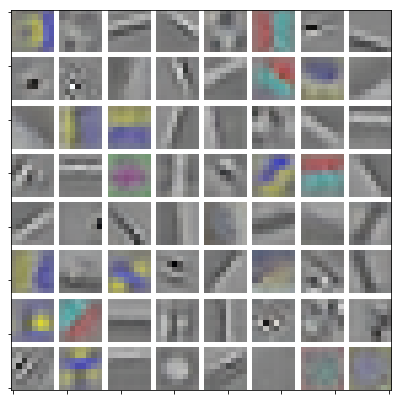

In [4]:
D = util.convdicts()['RGB:8x8x3x64']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 1e-1
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------


   0  2.19e+02  2.09e+00  2.17e+03  9.76e-01  7.24e-02  6.00e+00


   1  1.90e+02  8.55e+00  1.82e+03  8.25e-01  2.47e-01  6.00e+00


   2  1.64e+02  1.27e+01  1.51e+03  3.64e-01  2.86e-01  7.75e+00


   3  1.76e+02  1.39e+01  1.62e+03  2.87e-01  1.85e-01  6.18e+00


   4  1.61e+02  1.41e+01  1.47e+03  2.51e-01  1.40e-01  5.44e+00


   5  1.43e+02  1.48e+01  1.28e+03  2.16e-01  1.12e-01  5.44e+00


   6  1.35e+02  1.58e+01  1.19e+03  1.86e-01  8.33e-02  5.44e+00


   7  1.28e+02  1.67e+01  1.12e+03  1.50e-01  7.16e-02  5.44e+00


   8  1.24e+02  1.72e+01  1.07e+03  1.22e-01  6.59e-02  5.44e+00


   9  1.23e+02  1.74e+01  1.05e+03  1.04e-01  5.75e-02  5.44e+00


  10  1.19e+02  1.75e+01  1.02e+03  9.13e-02  5.06e-02  5.44e+00


  11  1.15e+02  1.77e+01  9.69e+02  8.13e-02  4.61e-02  5.44e+00


  12  1.11e+02  1.79e+01  9.26e+02  7.29e-02  4.15e-02  5.44e+00


  13  1.08e+02  1.81e+01  8.94e+02  6.55e-02  3.71e-02  5.44e+00


  14  1.05e+02  1.84e+01  8.70e+02  5.86e-02  3.39e-02  5.44e+00


  15  1.04e+02  1.85e+01  8.50e+02  5.24e-02  3.18e-02  5.44e+00


  16  1.03e+02  1.86e+01  8.40e+02  4.97e-02  2.91e-02  4.94e+00


  17  1.02e+02  1.86e+01  8.33e+02  4.57e-02  2.60e-02  4.94e+00


  18  1.00e+02  1.87e+01  8.18e+02  4.21e-02  2.40e-02  4.94e+00


  19  9.86e+01  1.87e+01  7.98e+02  3.88e-02  2.25e-02  4.94e+00


  20  9.71e+01  1.88e+01  7.82e+02  3.60e-02  2.09e-02  4.94e+00


  21  9.59e+01  1.89e+01  7.70e+02  3.35e-02  1.93e-02  4.94e+00


  22  9.48e+01  1.90e+01  7.58e+02  3.11e-02  1.82e-02  4.94e+00


  23  9.39e+01  1.91e+01  7.48e+02  2.90e-02  1.74e-02  4.94e+00


  24  9.33e+01  1.91e+01  7.42e+02  2.82e-02  1.64e-02  4.50e+00


  25  9.30e+01  1.91e+01  7.39e+02  2.67e-02  1.51e-02  4.50e+00


  26  9.25e+01  1.91e+01  7.34e+02  2.52e-02  1.40e-02  4.50e+00


  27  9.18e+01  1.92e+01  7.26e+02  2.38e-02  1.32e-02  4.50e+00


  28  9.10e+01  1.92e+01  7.18e+02  2.25e-02  1.26e-02  4.50e+00


  29  9.02e+01  1.93e+01  7.10e+02  2.13e-02  1.20e-02  4.50e+00


  30  8.96e+01  1.93e+01  7.03e+02  2.02e-02  1.14e-02  4.50e+00


  31  8.91e+01  1.93e+01  6.97e+02  1.92e-02  1.09e-02  4.50e+00


  32  8.86e+01  1.94e+01  6.93e+02  1.82e-02  1.04e-02  4.50e+00


  33  8.82e+01  1.94e+01  6.88e+02  1.73e-02  9.98e-03  4.50e+00


  34  8.78e+01  1.94e+01  6.84e+02  1.66e-02  9.51e-03  4.50e+00


  35  8.73e+01  1.94e+01  6.79e+02  1.58e-02  9.07e-03  4.50e+00


  36  8.68e+01  1.94e+01  6.74e+02  1.51e-02  8.67e-03  4.50e+00


  37  8.64e+01  1.95e+01  6.69e+02  1.44e-02  8.34e-03  4.50e+00


  38  8.60e+01  1.95e+01  6.65e+02  1.38e-02  8.04e-03  4.50e+00


  39  8.56e+01  1.95e+01  6.61e+02  1.32e-02  7.73e-03  4.50e+00


  40  8.54e+01  1.95e+01  6.58e+02  1.27e-02  7.41e-03  4.50e+00


  41  8.51e+01  1.95e+01  6.56e+02  1.21e-02  7.11e-03  4.50e+00


  42  8.48e+01  1.96e+01  6.53e+02  1.16e-02  6.86e-03  4.50e+00


  43  8.46e+01  1.96e+01  6.50e+02  1.12e-02  6.62e-03  4.50e+00


  44  8.43e+01  1.96e+01  6.47e+02  1.08e-02  6.35e-03  4.50e+00


  45  8.40e+01  1.96e+01  6.44e+02  1.03e-02  6.08e-03  4.50e+00


  46  8.37e+01  1.96e+01  6.41e+02  9.96e-03  5.86e-03  4.50e+00


  47  8.35e+01  1.96e+01  6.38e+02  9.58e-03  5.64e-03  4.50e+00


  48  8.32e+01  1.96e+01  6.36e+02  9.22e-03  5.43e-03  4.50e+00


  49  8.30e+01  1.96e+01  6.34e+02  8.88e-03  5.22e-03  4.50e+00


  50  8.29e+01  1.97e+01  6.32e+02  8.55e-03  5.04e-03  4.50e+00


  51  8.27e+01  1.97e+01  6.30e+02  8.23e-03  4.87e-03  4.50e+00


  52  8.25e+01  1.97e+01  6.28e+02  7.93e-03  4.71e-03  4.50e+00


  53  8.23e+01  1.97e+01  6.26e+02  7.66e-03  4.55e-03  4.50e+00


  54  8.21e+01  1.97e+01  6.24e+02  7.39e-03  4.39e-03  4.50e+00


  55  8.19e+01  1.97e+01  6.22e+02  7.13e-03  4.24e-03  4.50e+00


  56  8.18e+01  1.97e+01  6.21e+02  6.88e-03  4.11e-03  4.50e+00


  57  8.16e+01  1.97e+01  6.19e+02  6.64e-03  3.98e-03  4.50e+00


  58  8.15e+01  1.97e+01  6.17e+02  6.41e-03  3.84e-03  4.50e+00


  59  8.13e+01  1.97e+01  6.16e+02  6.20e-03  3.70e-03  4.50e+00


  60  8.12e+01  1.97e+01  6.14e+02  6.00e-03  3.58e-03  4.50e+00


  61  8.11e+01  1.97e+01  6.13e+02  5.80e-03  3.45e-03  4.50e+00


  62  8.09e+01  1.98e+01  6.12e+02  5.61e-03  3.33e-03  4.50e+00


  63  8.08e+01  1.98e+01  6.10e+02  5.42e-03  3.23e-03  4.50e+00


  64  8.07e+01  1.98e+01  6.09e+02  5.25e-03  3.13e-03  4.50e+00


  65  8.05e+01  1.98e+01  6.08e+02  5.07e-03  3.05e-03  4.50e+00


  66  8.04e+01  1.98e+01  6.06e+02  5.10e-03  2.96e-03  4.11e+00


  67  8.04e+01  1.98e+01  6.06e+02  4.97e-03  2.85e-03  4.11e+00
----------------------------------------------------------------
ConvBPDN solve time: 40.52s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 36.88dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

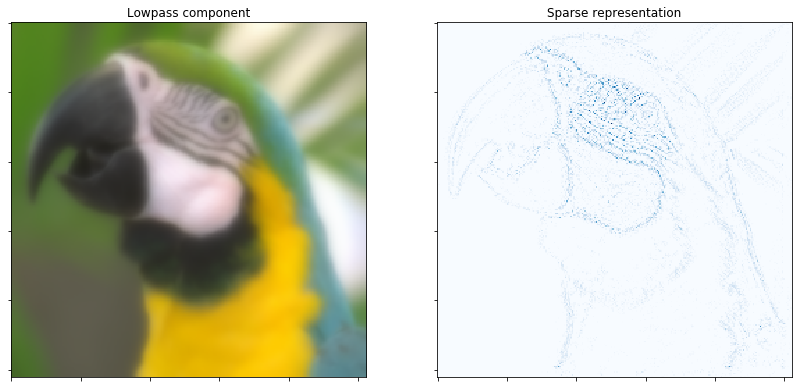

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

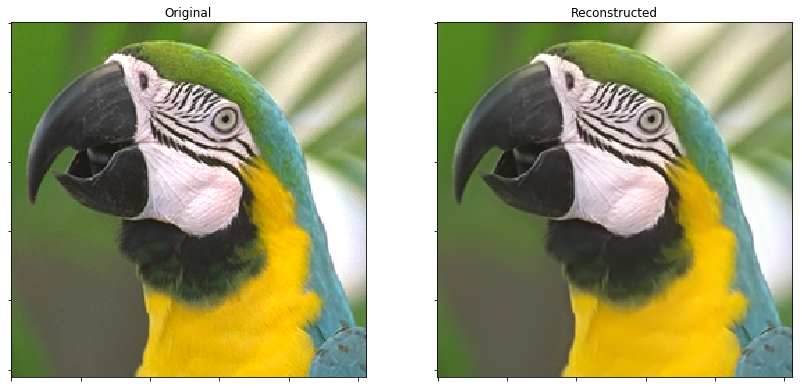

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

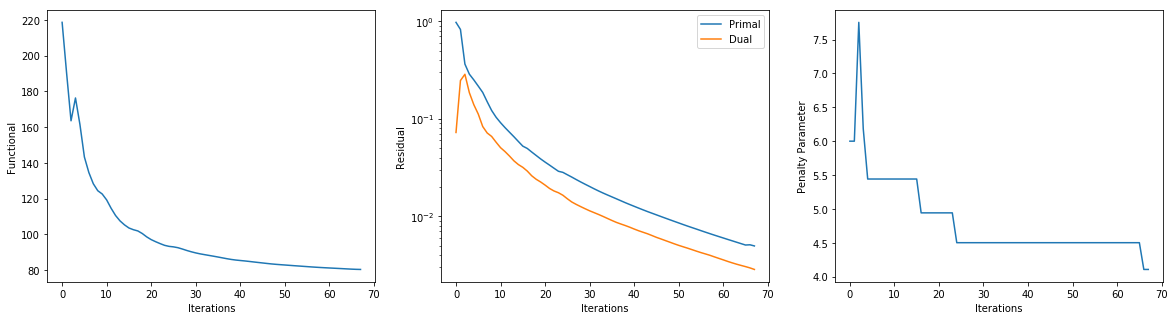

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()